# COMP559 HW2
## Author: Syed Saqib Habeeb (sh212)
### Problem 3

In [380]:
import matplotlib.pyplot as plt
import math
import sklearn as sk
import scipy as sp
import torch
import tensorflow as tf
import random as rn
from sklearn import datasets
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [381]:
def generate_cylinder(n_samples):
    X = []
    for i in range(n_samples):
        theta = rn.random() * 2 * math.pi
        c = math.cos(theta)
        s = math.sin(theta)
        r = rn.random()
        X.append([c, s, r])
    return np.array(X)

In [382]:
x,t=datasets.make_swiss_roll(noise=0.05,random_state=0)

In [383]:
x

array([[-8.80075108e+00,  1.41978674e+01, -4.48100686e+00],
       [ 5.00292632e+00,  5.60099924e+00, -1.02999008e+01],
       [-5.94536590e+00,  1.53599275e+01, -8.58857436e+00],
       [-9.00165716e+00,  2.02364784e+01, -4.01160585e+00],
       [-6.57221144e+00,  5.16437305e+00,  5.77199196e+00],
       [-2.00439140e+00,  1.20739632e+01, -1.05932991e+01],
       [-7.30388555e+00,  1.24030649e+01,  4.94987651e+00],
       [ 1.11817136e+01,  1.20146617e+01,  6.88189618e+00],
       [ 4.57119516e+00,  4.58790030e+00,  1.29928260e+01],
       [-3.74537814e+00,  2.00171682e+01,  7.42292264e+00],
       [ 1.12000648e+01,  9.41582750e+00, -4.66221722e+00],
       [-9.41697998e+00,  1.77790032e+01, -2.62801740e+00],
       [-8.00670981e+00,  1.46735205e+01, -6.03533589e+00],
       [ 8.68419842e+00,  6.25104598e+00,  1.02092679e+01],
       [ 3.38600647e+00,  1.71097065e+01, -4.20609197e+00],
       [ 4.06620844e+00,  8.18799092e+00, -3.82001676e+00],
       [ 9.71472664e-01,  1.86009628e+01

In [384]:
x.shape

(100, 3)

In [385]:
a=generate_cylinder(100)

In [386]:
a

array([[-0.94331505,  0.33189866,  0.15261609],
       [ 0.99933668,  0.0364169 ,  0.58672887],
       [ 0.40017812, -0.91643738,  0.85196648],
       [-0.83012134,  0.55758278,  0.27842757],
       [ 0.73285453, -0.68038536,  0.84912519],
       [ 0.98731324,  0.15878464,  0.55619149],
       [ 0.94476   ,  0.32776293,  0.38286106],
       [ 0.68691258,  0.72674006,  0.509148  ],
       [ 0.96664059,  0.25613662,  0.68492471],
       [ 0.98565991, -0.16874402,  0.90850879],
       [ 0.97066546,  0.24043412,  0.49850011],
       [-0.96475746, -0.26314071,  0.92423976],
       [-0.96177531,  0.27383984,  0.71330225],
       [-0.15497162, -0.98791892,  0.98077506],
       [ 0.99350625, -0.11377758,  0.57213429],
       [-0.06753021, -0.99771723,  0.00427125],
       [-0.71213123,  0.70204637,  0.49043986],
       [-0.16100614,  0.98695341,  0.0844364 ],
       [ 0.99860709,  0.0527624 ,  0.86716088],
       [-0.97467246, -0.2236372 ,  0.5182244 ],
       [-0.84670067, -0.53206952,  0.002

In [387]:
a.shape

(100, 3)

In [388]:
def apply_isomap(data,numNeighbours,numComponents):
    isomap=Isomap(n_neighbors=numNeighbours, n_components=numComponents)
    return isomap.fit_transform(data)

In [389]:
def apply_laplacian(data,numNeighbours,numComponents):
    lap=SpectralEmbedding(n_components=numComponents,n_neighbors=numNeighbours)
    return lap.fit_transform(data)

In [390]:
def apply_tsne(data,numNeighbours,numComponents):
    tsne=TSNE(n_components=numComponents,perplexity=numNeighbours)
    return tsne.fit_transform(data)

In [391]:
def autoencoder(data,encoding_dim):
    epochs=100
    batch_size=32

    input_dim=data.shape[1]
    input_layer = Input(shape=(input_dim,))

    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(encoding_dim, activation='linear')(encoded)

    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)
    autoencoder.compile(optimizer=Adam(), loss='mse')

    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)
    autoencoder.compile(optimizer=Adam(), loss='mse')
    
    autoencoder.fit(data, data, epochs=epochs, batch_size=batch_size, shuffle=True, verbose=0)
    
    return encoder.predict(data)
    

In [392]:
def plot_embedding(X_embedded, title, labels=None):
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)
    plt.title(title)
    plt.xlabel("First dimension")
    plt.ylabel("Second dimension")

In [393]:
#generate datasets

numSamples=1000

X_swiss, color_swiss = datasets.make_swiss_roll(n_samples=numSamples, noise=0.05)
X_swiss = X_swiss.astype(np.float32)

X_cylinder = generate_cylinder(1500)
color_cylinder = X_cylinder[:, 2]

digits = datasets.load_digits()
X_digits = digits.data.astype(np.float32)
y_digits = digits.target

In [394]:
n_components=2
n_neighbours=10


In [395]:
swiss_isomap=apply_isomap(X_swiss,n_neighbours,n_components)

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


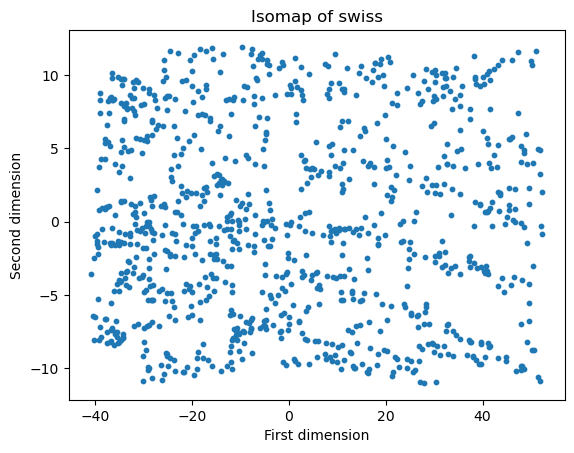

In [396]:
plot_embedding(swiss_isomap,"Isomap of swiss")
plt.savefig("./figs/swiss_isomap.png")

In [397]:
swiss_laplacian=apply_laplacian(X_swiss,n_neighbours,n_components)

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


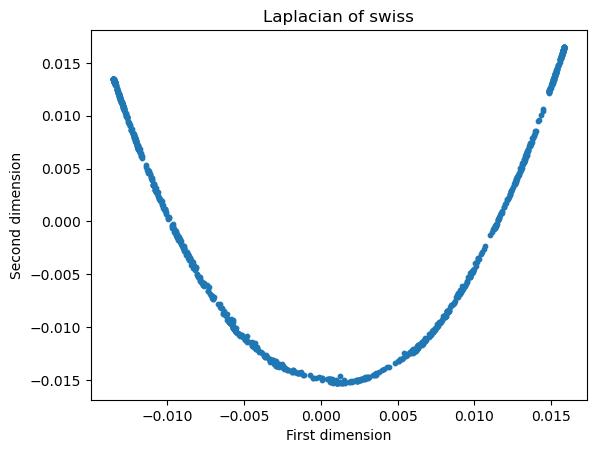

In [398]:
plot_embedding(swiss_laplacian,"Laplacian of swiss")
plt.savefig("./figs/swiss_laplacian.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


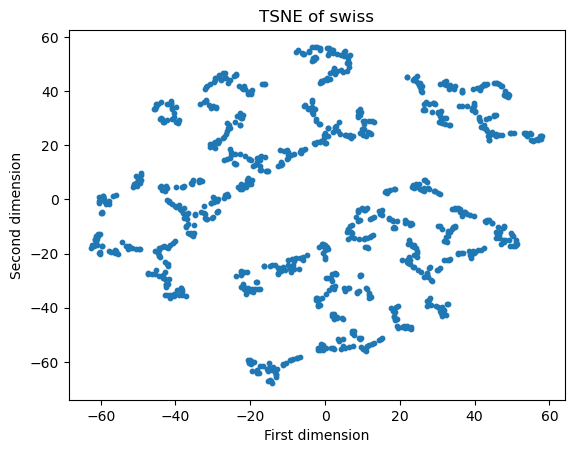

In [399]:
swiss_tsne=apply_tsne(X_swiss,n_neighbours,n_components)
plot_embedding(swiss_tsne,"TSNE of swiss")
plt.savefig("./figs/swiss_tsne.png")

In [400]:
swiss_autoencoder=autoencoder(X_swiss,n_components)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step


/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


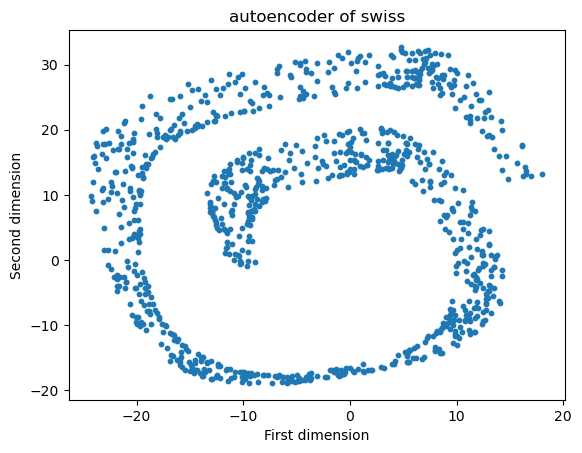

In [401]:
plot_embedding(swiss_autoencoder,"autoencoder of swiss")
plt.savefig("./figs/swiss_autoencoder.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


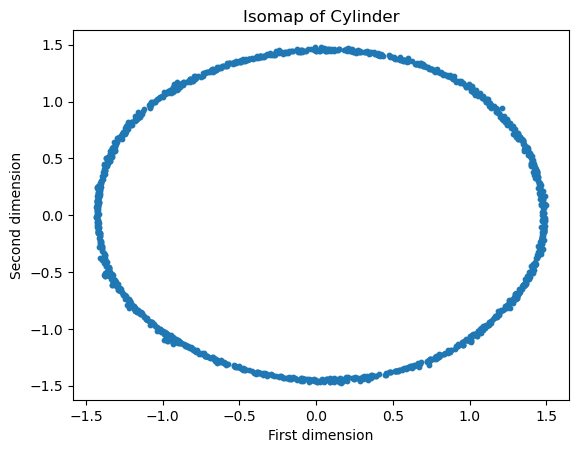

In [402]:
cylinder_isomap=apply_isomap(X_cylinder,n_neighbours,n_components)
plot_embedding(cylinder_isomap,"Isomap of Cylinder")
plt.savefig("./figs/cylinder_isomap.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


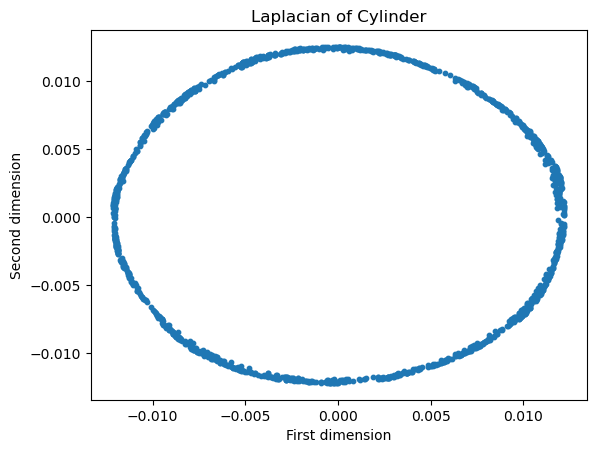

In [403]:
cylinder_laplacian=apply_laplacian(X_cylinder,n_neighbours,n_components)
plot_embedding(cylinder_laplacian,"Laplacian of Cylinder")
plt.savefig("./figs/cylinder_laplacian.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


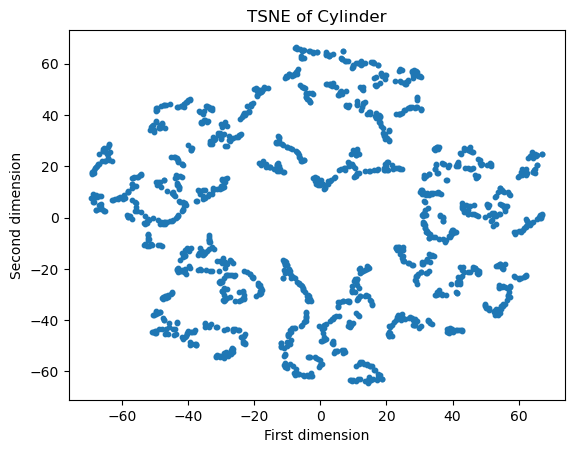

In [404]:
cylinder_tsne=apply_tsne(X_cylinder,n_neighbours,n_components)
plot_embedding(cylinder_tsne,"TSNE of Cylinder")
plt.savefig("./figs/cylinder_tsne.png")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step


/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


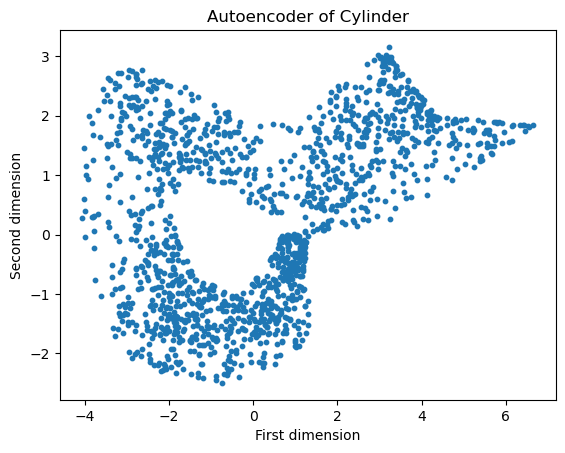

In [405]:
cylinder_autoencoder=autoencoder(X_cylinder,n_components)
plot_embedding(cylinder_autoencoder,"Autoencoder of Cylinder")
plt.savefig("./figs/cylinder_autoencoder.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


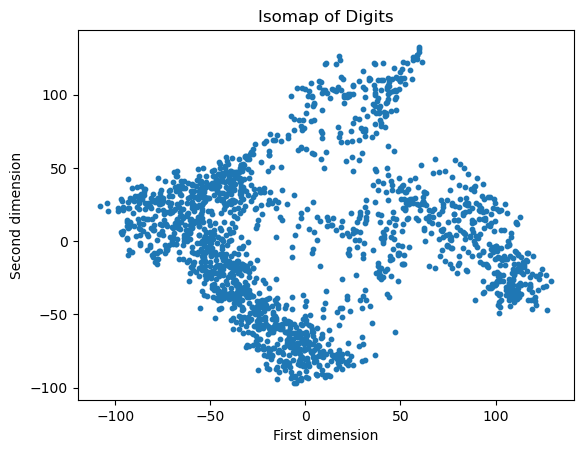

In [406]:
digits_isomap=apply_isomap(X_digits,n_neighbours,n_components)
plot_embedding(digits_isomap,"Isomap of Digits")
plt.savefig("./figs/digits_isomap.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


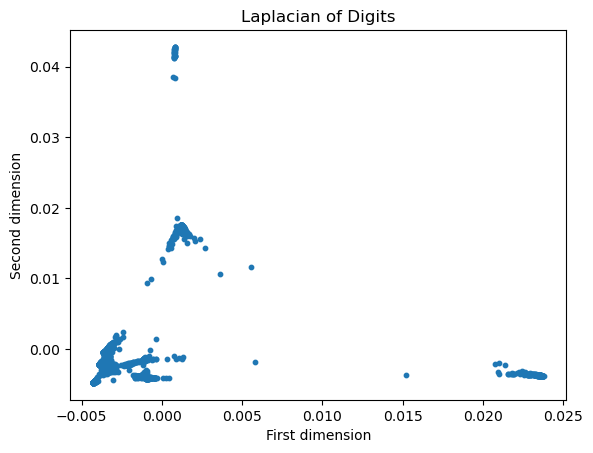

In [407]:
digits_laplacian=apply_laplacian(X_digits,n_neighbours,n_components)
plot_embedding(digits_laplacian,"Laplacian of Digits")
plt.savefig("./figs/digits_laplacian.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


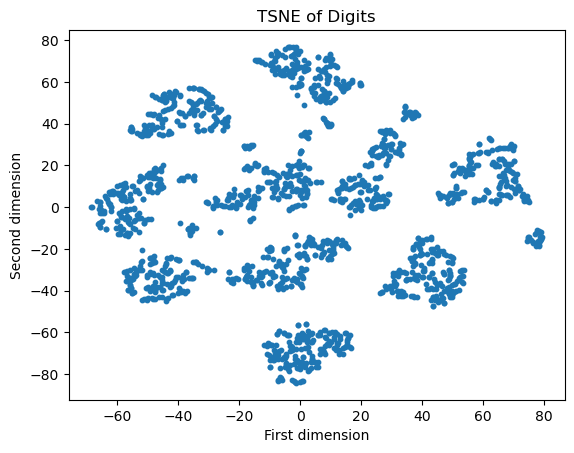

In [408]:
digits_tsne=apply_tsne(X_digits,n_neighbours,n_components)
plot_embedding(digits_tsne,"TSNE of Digits")
plt.savefig("./figs/digits_tsne.png")

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step


/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


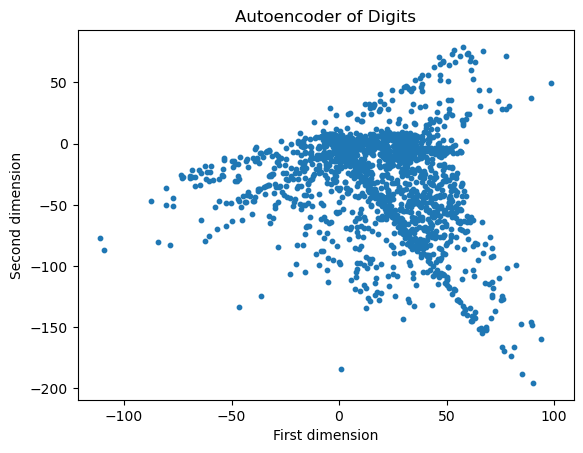

In [409]:
digits_autoencoder=autoencoder(X_digits,n_components)
plot_embedding(digits_autoencoder,"Autoencoder of Digits")
plt.savefig("./figs/digits_autoencoder.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/2792295741.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(digits_autoencoder[:, 0], digits_autoencoder[:, 1], c=None, cmap='Spectral', s=10, label="Autoencoder")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/2792295741.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(digits_tsne[:, 0], digits_tsne[:, 1], c=None, cmap='red', s=10, label="TSNE")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/2792295741.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(digits_isomap[:, 0], digits_isomap[:, 1], c=None, cmap='green', s=10, label="Isomap")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/2792295741.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  

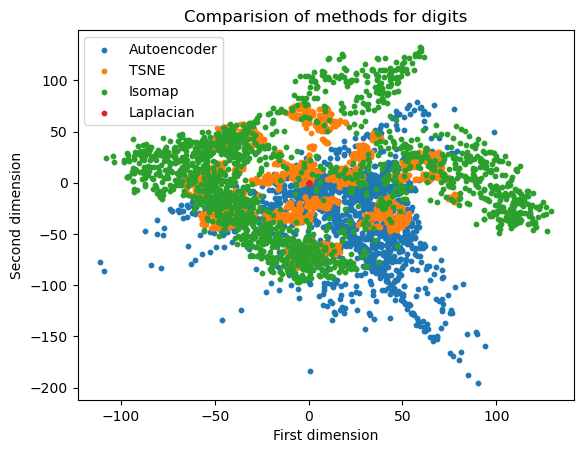

In [410]:
plt.scatter(digits_autoencoder[:, 0], digits_autoencoder[:, 1], c=None, cmap='Spectral', s=10, label="Autoencoder")
plt.scatter(digits_tsne[:, 0], digits_tsne[:, 1], c=None, cmap='red', s=10, label="TSNE")
plt.scatter(digits_isomap[:, 0], digits_isomap[:, 1], c=None, cmap='green', s=10, label="Isomap")
plt.scatter(digits_laplacian[:, 0], digits_laplacian[:, 1], c=None, cmap='black', s=10, label="Laplacian")
plt.title("Comparision of methods for digits")
plt.legend()
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.savefig("./figs/comp_methods_digits.png")
plt.show()

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1432507352.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(swiss_autoencoder[:, 0], swiss_autoencoder[:, 1], c=None, cmap='Spectral', s=10, label="Autoencoder")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1432507352.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(swiss_tsne[:, 0], swiss_tsne[:, 1], c=None, cmap='red', s=10, label="TSNE")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1432507352.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(swiss_isomap[:, 0], swiss_isomap[:, 1], c=None, cmap='green', s=10, label="Isomap")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1432507352.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.sc

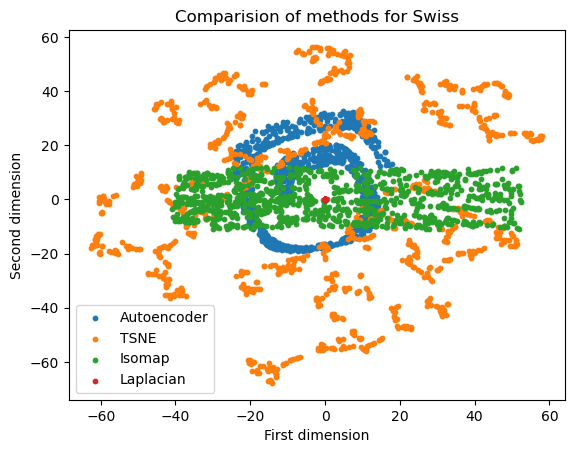

In [411]:
plt.scatter(swiss_autoencoder[:, 0], swiss_autoencoder[:, 1], c=None, cmap='Spectral', s=10, label="Autoencoder")
plt.scatter(swiss_tsne[:, 0], swiss_tsne[:, 1], c=None, cmap='red', s=10, label="TSNE")
plt.scatter(swiss_isomap[:, 0], swiss_isomap[:, 1], c=None, cmap='green', s=10, label="Isomap")
plt.scatter(swiss_laplacian[:, 0], swiss_laplacian[:, 1], c=None, cmap='black', s=10, label="Laplacian")
plt.title("Comparision of methods for Swiss")
plt.legend()
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.savefig("./figs/comp_methods_swiss.png")
plt.show()

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1883778931.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cylinder_autoencoder[:, 0], cylinder_autoencoder[:, 1], c=None, cmap='Spectral', s=10, label="Autoencoder")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1883778931.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cylinder_tsne[:, 0], cylinder_tsne[:, 1], c=None, cmap='red', s=10, label="TSNE")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1883778931.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cylinder_isomap[:, 0], cylinder_isomap[:, 1], c=None, cmap='green', s=10, label="Isomap")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1883778931.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will b

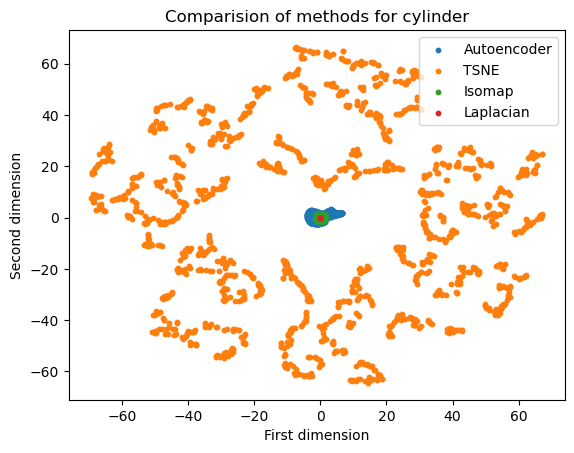

In [412]:
plt.scatter(cylinder_autoencoder[:, 0], cylinder_autoencoder[:, 1], c=None, cmap='Spectral', s=10, label="Autoencoder")
plt.scatter(cylinder_tsne[:, 0], cylinder_tsne[:, 1], c=None, cmap='red', s=10, label="TSNE")
plt.scatter(cylinder_isomap[:, 0], cylinder_isomap[:, 1], c=None, cmap='green', s=10, label="Isomap")
plt.scatter(cylinder_laplacian[:, 0], cylinder_laplacian[:, 1], c=None, cmap='black', s=10, label="Laplacian")
plt.title("Comparision of methods for cylinder")
plt.legend()
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.savefig("./figs/comp_methods_cylinder.png")
plt.show()

In [413]:
#scaling data

In [414]:
X_swiss_scaled = MinMaxScaler().fit_transform(X_swiss)
X_cylinder_scaled = MinMaxScaler().fit_transform(X_cylinder)
X_digits_scaled = MinMaxScaler().fit_transform(X_digits)

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


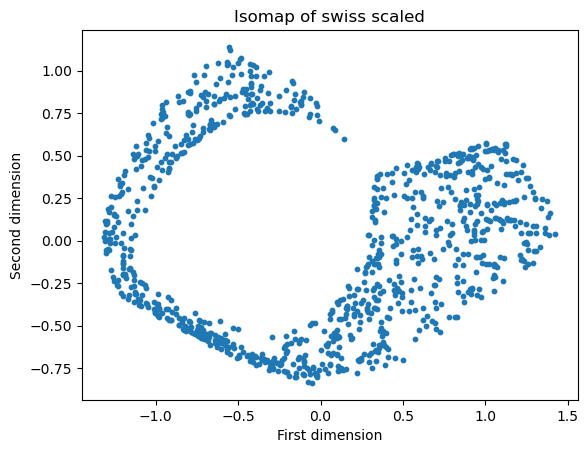

In [415]:
swiss_isomap_scaled=apply_isomap(X_swiss_scaled,n_neighbours,n_components)
plot_embedding(swiss_isomap_scaled,"Isomap of swiss scaled")
plt.savefig("./figs/swiss_isomap_scaled.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


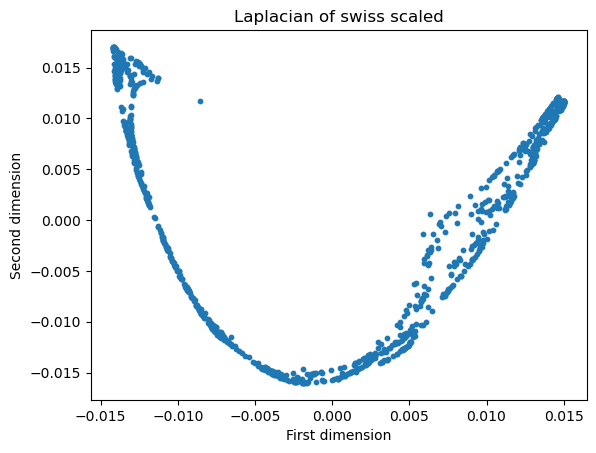

In [416]:
swiss_laplacian_scaled=apply_laplacian(X_swiss_scaled,n_neighbours,n_components)
plot_embedding(swiss_laplacian_scaled,"Laplacian of swiss scaled")
plt.savefig("./figs/swiss_laplacian_scaled.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


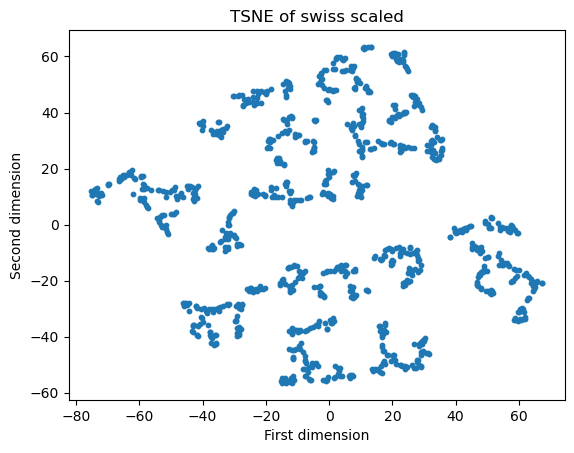

In [417]:
swiss_tsne_scaled=apply_tsne(X_swiss_scaled,n_neighbours,n_components)
plot_embedding(swiss_tsne_scaled,"TSNE of swiss scaled")
plt.savefig("./figs/swiss_tsne_scaled.png")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step


/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


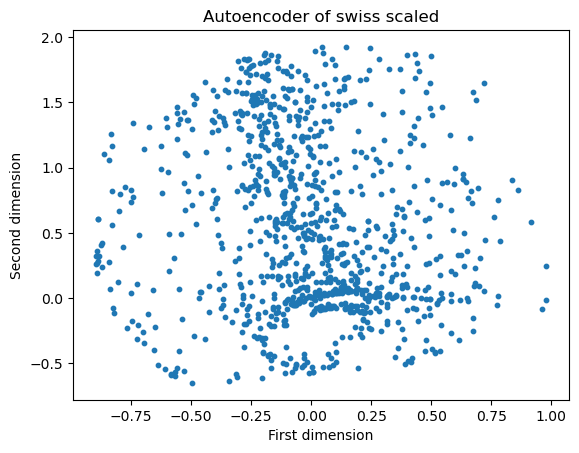

In [418]:
swiss_autoencoder_scaled=autoencoder(X_swiss_scaled,n_components)
plot_embedding(swiss_autoencoder_scaled,"Autoencoder of swiss scaled")
plt.savefig("./figs/swiss_autoencoder_scaled.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


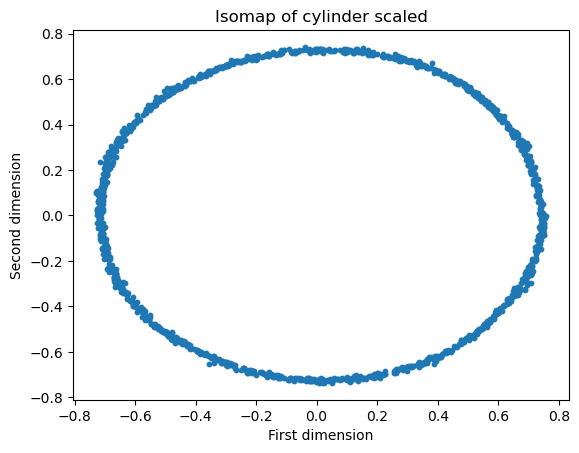

In [419]:
cylinder_isomap_scaled=apply_isomap(X_cylinder_scaled,n_neighbours,n_components)
plot_embedding(cylinder_isomap_scaled,"Isomap of cylinder scaled")
plt.savefig("./figs/cylinder_isomap_scaled.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


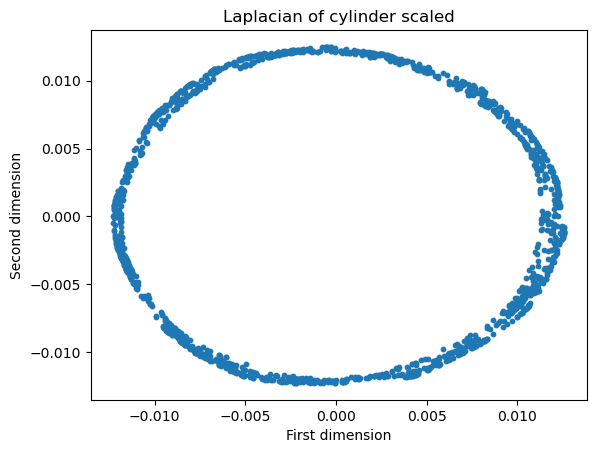

In [420]:
cylinder_laplacian_scaled=apply_laplacian(X_cylinder_scaled,n_neighbours,n_components)
plot_embedding(cylinder_laplacian_scaled,"Laplacian of cylinder scaled")
plt.savefig("./figs/cylinder_laplacian_scaled.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


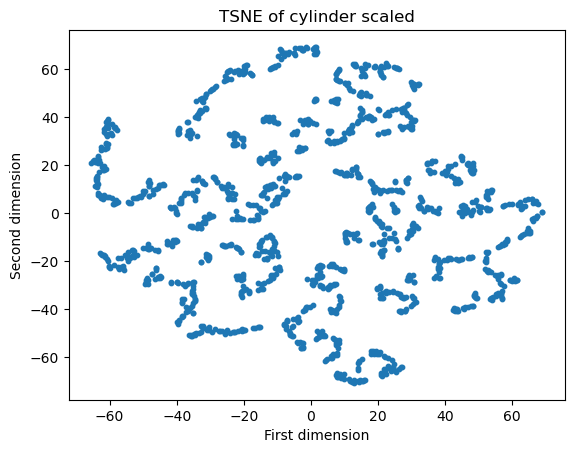

In [421]:
cylinder_tsne_scaled=apply_tsne(X_cylinder_scaled,n_neighbours,n_components)
plot_embedding(cylinder_tsne_scaled,"TSNE of cylinder scaled")
plt.savefig("./figs/cylinder_tsne_scaled.png")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step


/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


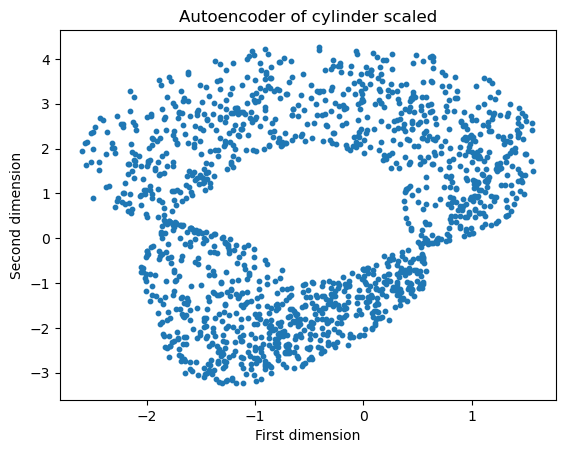

In [422]:
cylinder_autoencoder_scaled=autoencoder(X_cylinder_scaled,n_components)
plot_embedding(cylinder_autoencoder_scaled,"Autoencoder of cylinder scaled")
plt.savefig("./figs/cylinder_autoencoder_scaled.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


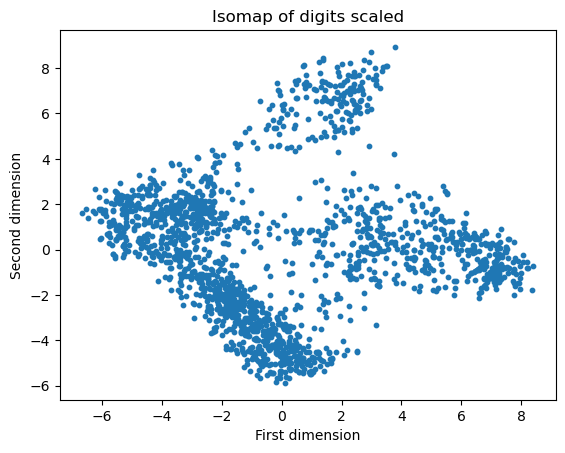

In [423]:
digits_isomap_scaled=apply_isomap(X_digits_scaled,n_neighbours,n_components)
plot_embedding(digits_isomap_scaled,"Isomap of digits scaled")
plt.savefig("./figs/digits_isomap_scaled.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


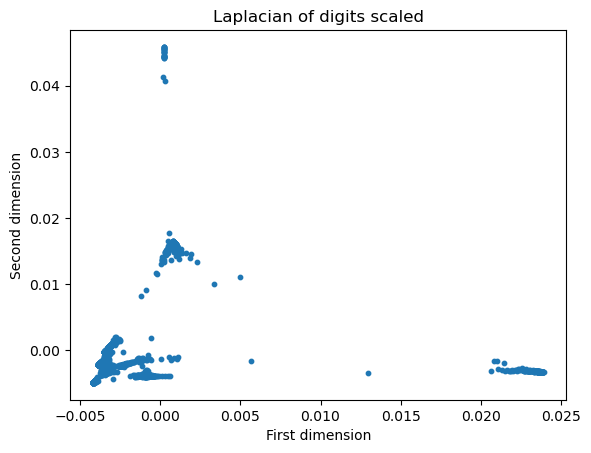

In [424]:
digits_laplacian_scaled=apply_laplacian(X_digits_scaled,n_neighbours,n_components)
plot_embedding(digits_laplacian_scaled,"Laplacian of digits scaled")
plt.savefig("./figs/digits_laplacian_scaled.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


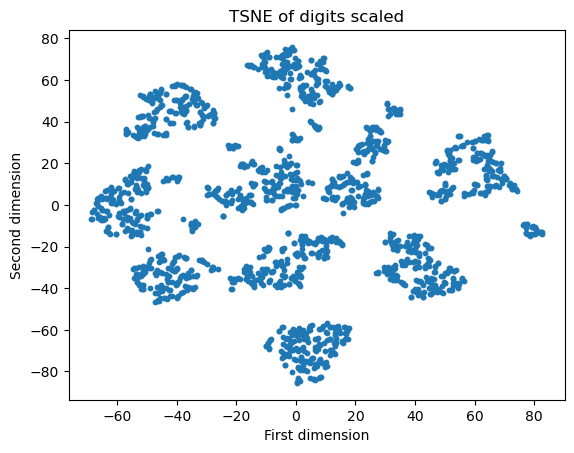

In [425]:
digits_tsne_scaled=apply_tsne(X_digits_scaled,n_neighbours,n_components)
plot_embedding(digits_tsne_scaled,"TSNE of digits scaled")
plt.savefig("./figs/digits_tsne_scaled.png")

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step


/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/531639621.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='Spectral', s=10)


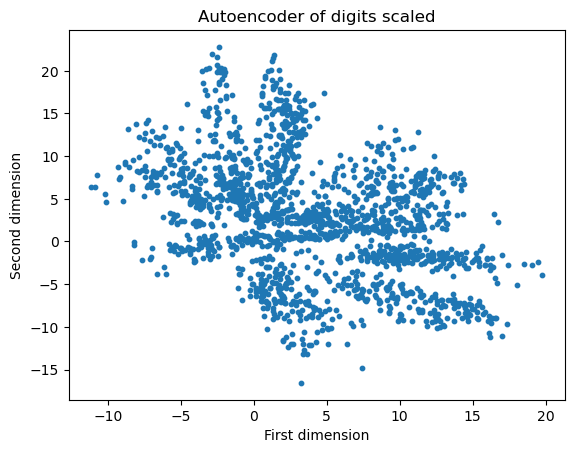

In [426]:
digits_autoencoder_scaled=autoencoder(X_digits_scaled,n_components)
plot_embedding(digits_autoencoder_scaled,"Autoencoder of digits scaled")
plt.savefig("./figs/digits_autoencoder_scaled.png")

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/3324076517.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(digits_autoencoder_scaled[:, 0], digits_autoencoder_scaled[:, 1], c=None, cmap='Spectral', s=10, label="Autoencoder")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/3324076517.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(digits_tsne_scaled[:, 0], digits_tsne_scaled[:, 1], c=None, cmap='red', s=10, label="TSNE")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/3324076517.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(digits_isomap_scaled[:, 0], digits_isomap_scaled[:, 1], c=None, cmap='green', s=10, label="Isomap")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/3324076517.py:4: UserWarning: No data for colormapping provided via

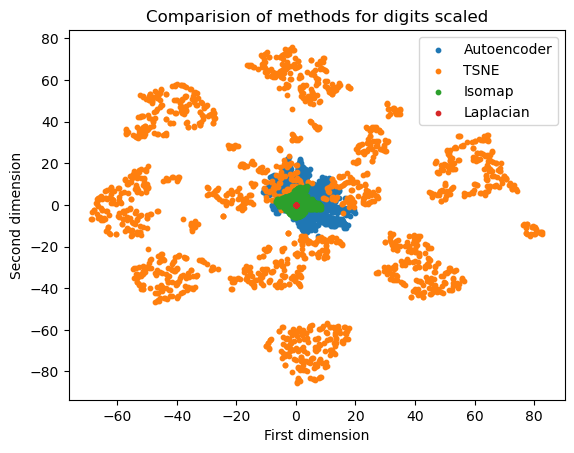

In [427]:
plt.scatter(digits_autoencoder_scaled[:, 0], digits_autoencoder_scaled[:, 1], c=None, cmap='Spectral', s=10, label="Autoencoder")
plt.scatter(digits_tsne_scaled[:, 0], digits_tsne_scaled[:, 1], c=None, cmap='red', s=10, label="TSNE")
plt.scatter(digits_isomap_scaled[:, 0], digits_isomap_scaled[:, 1], c=None, cmap='green', s=10, label="Isomap")
plt.scatter(digits_laplacian_scaled[:, 0], digits_laplacian_scaled[:, 1], c=None, cmap='black', s=10, label="Laplacian")
plt.title("Comparision of methods for digits scaled")
plt.legend()
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.savefig("./figs/comp_methods_digits_scaled.png")
plt.show()

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/3642839037.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cylinder_autoencoder_scaled[:, 0], cylinder_autoencoder_scaled[:, 1], c=None, cmap='Spectral', s=10, label="Autoencoder")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/3642839037.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cylinder_tsne_scaled[:, 0], cylinder_tsne_scaled[:, 1], c=None, cmap='red', s=10, label="TSNE")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/3642839037.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cylinder_isomap_scaled[:, 0], cylinder_isomap_scaled[:, 1], c=None, cmap='green', s=10, label="Isomap")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/3642839037.py:4: UserWarning: No data for colormapping 

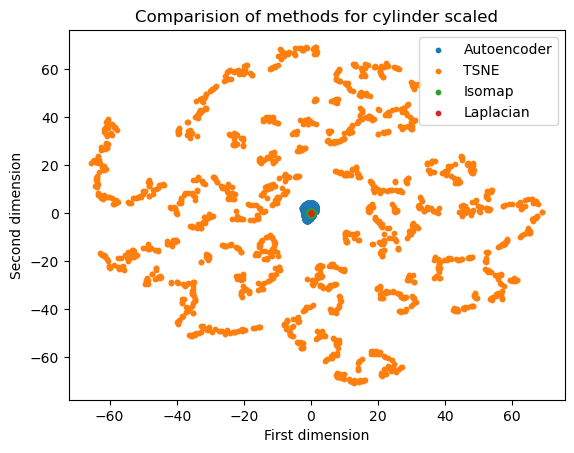

In [428]:
plt.scatter(cylinder_autoencoder_scaled[:, 0], cylinder_autoencoder_scaled[:, 1], c=None, cmap='Spectral', s=10, label="Autoencoder")
plt.scatter(cylinder_tsne_scaled[:, 0], cylinder_tsne_scaled[:, 1], c=None, cmap='red', s=10, label="TSNE")
plt.scatter(cylinder_isomap_scaled[:, 0], cylinder_isomap_scaled[:, 1], c=None, cmap='green', s=10, label="Isomap")
plt.scatter(cylinder_laplacian_scaled[:, 0], cylinder_laplacian_scaled[:, 1], c=None, cmap='black', s=10, label="Laplacian")
plt.title("Comparision of methods for cylinder scaled")
plt.legend()
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.savefig("./figs/comp_methods_cylinder_scaled.png")
plt.show()

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/3671866686.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(swiss_autoencoder_scaled[:, 0], swiss_autoencoder_scaled[:, 1], c=None, cmap='Spectral', s=10, label="Autoencoder")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/3671866686.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(swiss_tsne_scaled[:, 0], swiss_tsne_scaled[:, 1], c=None, cmap='red', s=10, label="TSNE")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/3671866686.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(swiss_isomap_scaled[:, 0], swiss_isomap_scaled[:, 1], c=None, cmap='green', s=10, label="Isomap")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/3671866686.py:4: UserWarning: No data for colormapping provided via 'c'. 

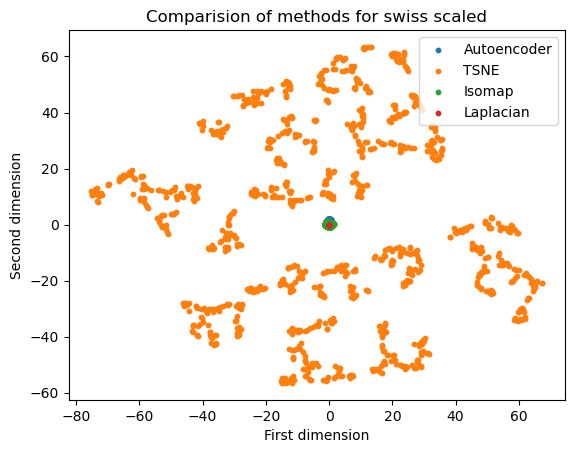

In [429]:
plt.scatter(swiss_autoencoder_scaled[:, 0], swiss_autoencoder_scaled[:, 1], c=None, cmap='Spectral', s=10, label="Autoencoder")
plt.scatter(swiss_tsne_scaled[:, 0], swiss_tsne_scaled[:, 1], c=None, cmap='red', s=10, label="TSNE")
plt.scatter(swiss_isomap_scaled[:, 0], swiss_isomap_scaled[:, 1], c=None, cmap='green', s=10, label="Isomap")
plt.scatter(swiss_laplacian_scaled[:, 0], swiss_laplacian_scaled[:, 1], c=None, cmap='black', s=10, label="Laplacian")
plt.title("Comparision of methods for swiss scaled")
plt.legend()
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.savefig("./figs/comp_methods_swiss_scaled.png")
plt.show()

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/2191744918.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(swiss_autoencoder_scaled[:, 0], swiss_autoencoder_scaled[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/2191744918.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cylinder_autoencoder_scaled[:, 0], cylinder_autoencoder_scaled[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/2191744918.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(digits_autoencoder_scaled[:, 0], digits_autoencoder_scaled[:, 1], c=None, cmap='Spectral', s=10, label="digits")


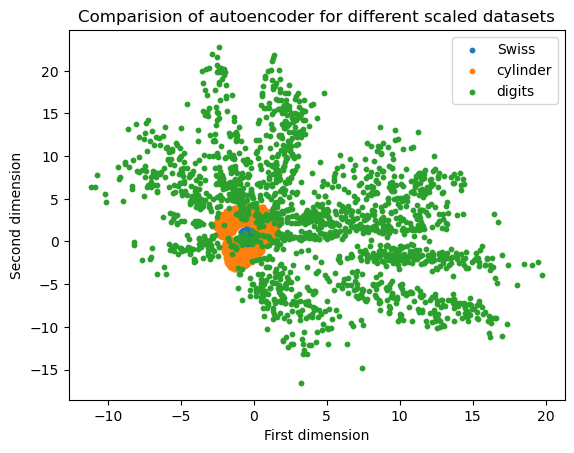

In [430]:
plt.scatter(swiss_autoencoder_scaled[:, 0], swiss_autoencoder_scaled[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
plt.scatter(cylinder_autoencoder_scaled[:, 0], cylinder_autoencoder_scaled[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
plt.scatter(digits_autoencoder_scaled[:, 0], digits_autoencoder_scaled[:, 1], c=None, cmap='Spectral', s=10, label="digits")
plt.title("Comparision of autoencoder for different scaled datasets")
plt.legend()
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.savefig("./figs/comp_autoencoder_scaled.png")
plt.show()

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/3466303563.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(swiss_isomap_scaled[:, 0], swiss_isomap_scaled[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/3466303563.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cylinder_isomap_scaled[:, 0], cylinder_isomap_scaled[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/3466303563.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(digits_isomap_scaled[:, 0], digits_isomap_scaled[:, 1], c=None, cmap='Spectral', s=10, label="digits")


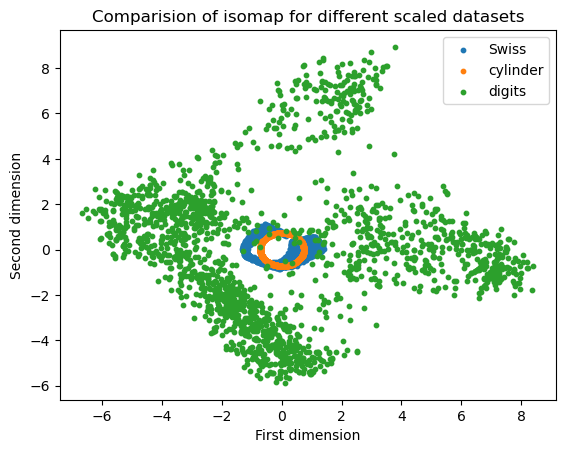

In [431]:
plt.scatter(swiss_isomap_scaled[:, 0], swiss_isomap_scaled[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
plt.scatter(cylinder_isomap_scaled[:, 0], cylinder_isomap_scaled[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
plt.scatter(digits_isomap_scaled[:, 0], digits_isomap_scaled[:, 1], c=None, cmap='Spectral', s=10, label="digits")
plt.title("Comparision of isomap for different scaled datasets")
plt.legend()
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.savefig("./figs/comp_isomap_scaled.png")
plt.show()

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/755358935.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(swiss_laplacian_scaled[:, 0], swiss_laplacian_scaled[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/755358935.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cylinder_laplacian_scaled[:, 0], cylinder_laplacian_scaled[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/755358935.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(digits_laplacian_scaled[:, 0], digits_laplacian_scaled[:, 1], c=None, cmap='Spectral', s=10, label="digits")


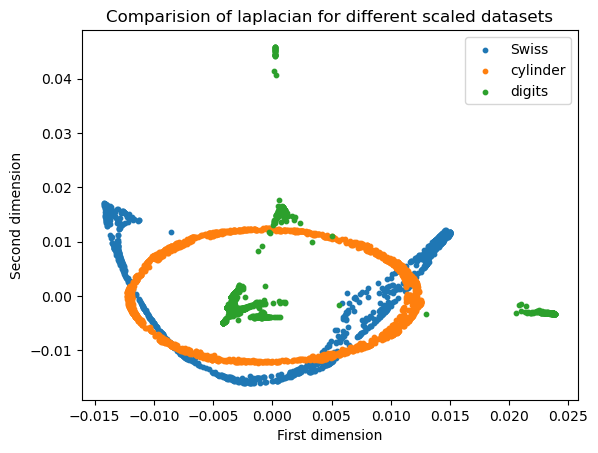

In [432]:
plt.scatter(swiss_laplacian_scaled[:, 0], swiss_laplacian_scaled[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
plt.scatter(cylinder_laplacian_scaled[:, 0], cylinder_laplacian_scaled[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
plt.scatter(digits_laplacian_scaled[:, 0], digits_laplacian_scaled[:, 1], c=None, cmap='Spectral', s=10, label="digits")
plt.title("Comparision of laplacian for different scaled datasets")
plt.legend()
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.savefig("./figs/comp_laplacian_scaled.png")
plt.show()

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/686634419.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(swiss_tsne_scaled[:, 0], swiss_tsne_scaled[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/686634419.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cylinder_tsne_scaled[:, 0], cylinder_tsne_scaled[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/686634419.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(digits_tsne_scaled[:, 0], digits_tsne_scaled[:, 1], c=None, cmap='Spectral', s=10, label="digits")


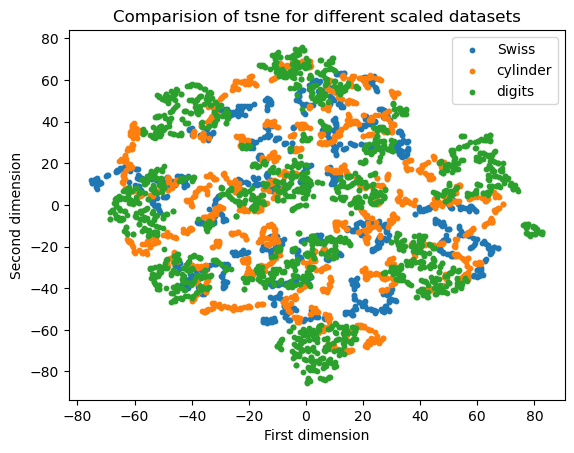

In [433]:
plt.scatter(swiss_tsne_scaled[:, 0], swiss_tsne_scaled[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
plt.scatter(cylinder_tsne_scaled[:, 0], cylinder_tsne_scaled[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
plt.scatter(digits_tsne_scaled[:, 0], digits_tsne_scaled[:, 1], c=None, cmap='Spectral', s=10, label="digits")
plt.title("Comparision of tsne for different scaled datasets")
plt.legend()
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.savefig("./figs/comp_tsne_scaled.png")
plt.show()

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1794822373.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(swiss_tsne[:, 0], swiss_tsne[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1794822373.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cylinder_tsne[:, 0], cylinder_tsne[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1794822373.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(digits_tsne[:, 0], digits_tsne[:, 1], c=None, cmap='Spectral', s=10, label="digits")


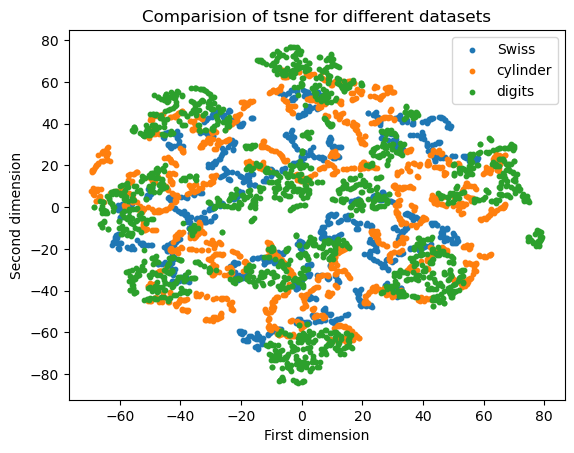

In [434]:
plt.scatter(swiss_tsne[:, 0], swiss_tsne[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
plt.scatter(cylinder_tsne[:, 0], cylinder_tsne[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
plt.scatter(digits_tsne[:, 0], digits_tsne[:, 1], c=None, cmap='Spectral', s=10, label="digits")
plt.title("Comparision of tsne for different datasets")
plt.legend()
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.savefig("./figs/comp_tsne.png")
plt.show()

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/417736171.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(swiss_autoencoder[:, 0], swiss_autoencoder[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/417736171.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cylinder_autoencoder[:, 0], cylinder_autoencoder[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/417736171.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(digits_autoencoder[:, 0], digits_autoencoder[:, 1], c=None, cmap='Spectral', s=10, label="digits")


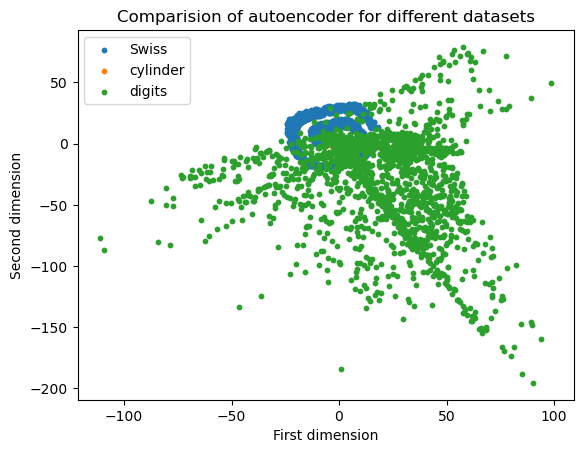

In [435]:
plt.scatter(swiss_autoencoder[:, 0], swiss_autoencoder[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
plt.scatter(cylinder_autoencoder[:, 0], cylinder_autoencoder[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
plt.scatter(digits_autoencoder[:, 0], digits_autoencoder[:, 1], c=None, cmap='Spectral', s=10, label="digits")
plt.title("Comparision of autoencoder for different datasets")
plt.legend()
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.savefig("./figs/comp_autoencoder.png")
plt.show()

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1236037321.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(swiss_laplacian[:, 0], swiss_laplacian[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1236037321.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cylinder_laplacian[:, 0], cylinder_laplacian[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1236037321.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(digits_laplacian[:, 0], digits_laplacian[:, 1], c=None, cmap='Spectral', s=10, label="digits")


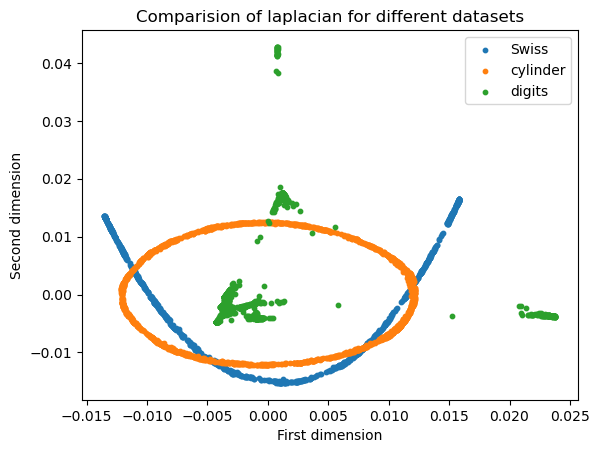

In [436]:
plt.scatter(swiss_laplacian[:, 0], swiss_laplacian[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
plt.scatter(cylinder_laplacian[:, 0], cylinder_laplacian[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
plt.scatter(digits_laplacian[:, 0], digits_laplacian[:, 1], c=None, cmap='Spectral', s=10, label="digits")
plt.title("Comparision of laplacian for different datasets")
plt.legend()
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.savefig("./figs/comp_laplacian.png")
plt.show()

/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1800531797.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(swiss_isomap[:, 0], swiss_isomap[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1800531797.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cylinder_isomap[:, 0], cylinder_isomap[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
/var/folders/h9/ndw0vfgs3n5bpzm828hf_chr0000gn/T/ipykernel_15413/1800531797.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(digits_isomap[:, 0], digits_isomap[:, 1], c=None, cmap='Spectral', s=10, label="digits")


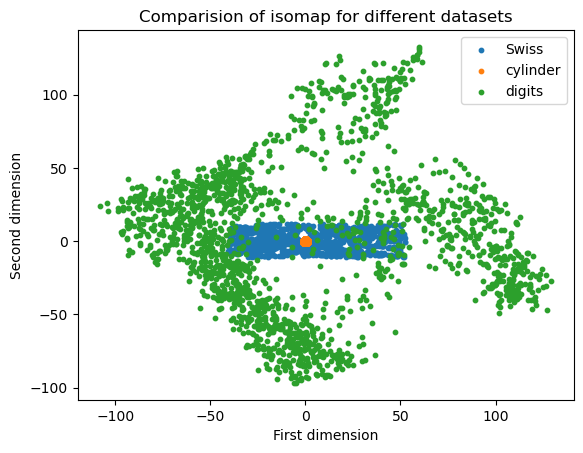

In [437]:
plt.scatter(swiss_isomap[:, 0], swiss_isomap[:, 1], c=None, cmap='Spectral', s=10, label="Swiss")
plt.scatter(cylinder_isomap[:, 0], cylinder_isomap[:, 1], c=None, cmap='Spectral', s=10, label="cylinder")
plt.scatter(digits_isomap[:, 0], digits_isomap[:, 1], c=None, cmap='Spectral', s=10, label="digits")
plt.title("Comparision of isomap for different datasets")
plt.legend()
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.savefig("./figs/comp_isomap.png")
plt.show()